<a href="https://colab.research.google.com/github/seupedro7/Dados-Abertos-Campeonato-Brasileiro/blob/master/Pedro_Oliveira_Trainee_CIS_1_semana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto 1 - Trainee - Tratamento dos dados**

Para o presente projeto, serão analisados dois Datasets com informações referentes a bolsa de valores brasileira.

O primeiro é um dataset que contém o principais indicadores fundamentalistas da bolsa de valores brasileira. Indicadores fundamentalistas são indicadores gerados a partir de dados das empresas, como lucro, dívida líquida, patrimonio líquido, etc. Eles servem para fundamentar a tese de investimento dos analistas do mercado financeiro. Alguns indicadores a serem destacados são Dividend Yeld (Dividendos pagos no ano), patrimonio líquido, preço por lucro, geração de caixa, etc.

No segundo, temos um dataset que contém as ações que compõe o índice BOVESPA da bolsa brasileira. O índice Bovespa é o mais importante indicador do desempenho médio das cotações das ações negociadas na B3. É formado pelas ações com maior volume negociado nos últimos meses. O dataset contém essas ações e a devida fatia que as ações representam no índice.

In [2]:
import seaborn as sns 
import statistics as stat
import string as st
import pandas as pd 
import numpy as np  
import matplotlib as mat
import matplotlib.pyplot as plt

import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [44]:

urlfile2="https://github.com/juvenalfonseca/python/raw/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv"
urlfile1="https://github.com/juvenalfonseca/python/raw/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv"
df_jogos=pd.read_csv(urlfile2, delimiter=";")
df_periodo=pd.read_csv(urlfile1, delimiter=";")
#padronizamos os dataframes em lower case
df_jogos.columns   = df_jogos.columns.str.lower()
df_periodo.columns = df_periodo.columns.str.lower()
### alteramos os campos de datas de char para date
df_periodo['inicio'] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'] = pd.to_datetime(df_periodo['fim'], format="%d/%m/%Y")
df_jogos['data'] = pd.to_datetime(df_jogos['data'], format="%d/%m/%Y")
df.rename(columns={'data': 'date'})
### captalizamos as strings
df_jogos['dia'] = df_jogos['dia'].str.title()
df_jogos['mandante'] = df_jogos['mandante' ].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor'] = df_jogos['vencedor' ].str.title()
df_jogos['arena'] = df_jogos['arena'    ].apply(lambda x: x.title())






In [47]:
### juntamos os datasets, de forma que ambos fosse relacionados por um atributo novo('new') e filtramos para mantes apenas as datas dentro do periodo de realização de cada torneio
df_periodo["new"] = 1
df_jogos["new"] = 1
 
df = pd.merge(df_periodo, df_jogos, on ='new').drop("new", 1)
df = df.query('data >= inicio & data <= fim')
df.head(5)

,torneio,inicio,fim,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


###Análise 1 - Gols


In [50]:
### gols por edição
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)
 
gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")
gols_edicao['gols_total'] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_perc'  ] = (gols_edicao['gols_mandante' ]/gols_edicao['gols_total'])*100
gols_edicao['gols_visitantes_perc'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100
 
gols_edicao

,torneio,gols_mandante,gols_visitante,gols_total,gols_mandante_perc,gols_visitantes_perc
0,BRA2003,982,610,1592,61.683417,38.316583
1,BRA2004,947,587,1534,61.734029,38.265971
2,BRA2005,835,616,1451,57.546520,42.453480
3,BRA2006,604,426,1030,58.640777,41.359223
4,BRA2007,638,414,1052,60.646388,39.353612
5,BRA2008,654,376,1030,63.495146,36.504854
6,BRA2009,659,435,1094,60.237660,39.762340
7,BRA2010,581,397,978,59.406953,40.593047
8,BRA2011,610,407,1017,59.980334,40.019666
9,BRA2012,559,380,939,59.531416,40.468584


In [51]:
### gols por edição comparativo
df1 = gols_edicao[['torneio','gols_mandante' ]]
df2 = gols_edicao[['torneio','gols_visitante']]
df3 = gols_edicao[['torneio','gols_total'    ]]
 
df1.rename(columns = {'gols_mandante' : 'gols' }, inplace=True)
df2.rename(columns = {'gols_visitante': 'gols' }, inplace=True)
df3.rename(columns = {'gols_total'    : 'gols' }, inplace=True)
 
df1['tipo_gols'] = 'gols_mandante'
df2['tipo_gols'] = 'gols_visitante'
df3['tipo_gols'] = 'gols_total'
 
df4 = pd.concat([df1, df2, df3]).reset_index(drop=True)

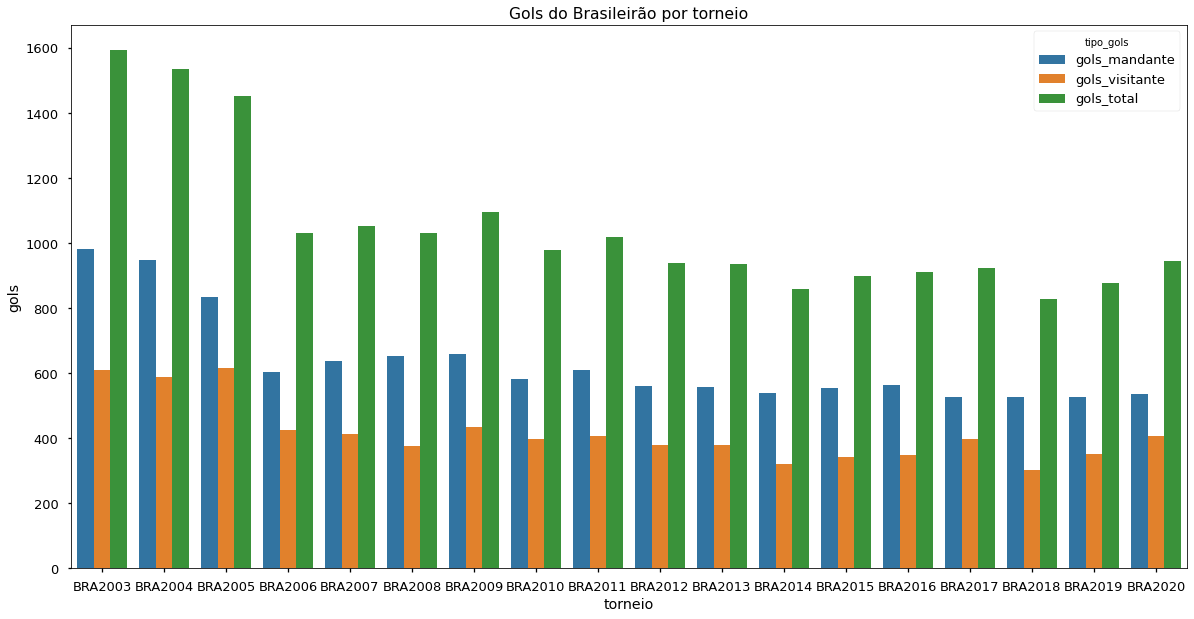

In [87]:
### gráfico gols por edição comparativo
sns.barplot(x="torneio", y="gols", hue="tipo_gols", data=df4)
plt.title('Gols do Brasileirão por torneio')
plt.rcParams['figure.figsize']=(20,10)


Uma informação interessante que esse grafíco passa é que o numero de gols totais por edição do brasileirao é sempre proximo de 1000, menos nas 3 primeiras edições do torneio, estas que contavam com 24 times na primeira divisão, enquanto as edições posteriores contam com apenas 20 times.

##Gols por time

In [89]:
gols_mandante_time  = df.groupby('mandante' )['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"mandante" : "time", 'mandante placar' : 'gols marcados' }, inplace=True)
 
gols_visitante_time = df.groupby('visitante')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"visitante": "time", 'visitante placar': 'gols marcados' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
 
gols_marcados_time = gols_time.groupby('time')['gols marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados_time.head(20)

,time,gols marcados
0,Santos,1060
1,São Paulo,1037
2,Flamengo,984
3,Cruzeiro,978
4,Atlético-Mg,967
5,Fluminense,946
6,Grêmio,912
7,Internacional,893
8,Athlético-Pr,892
9,Palmeiras,889


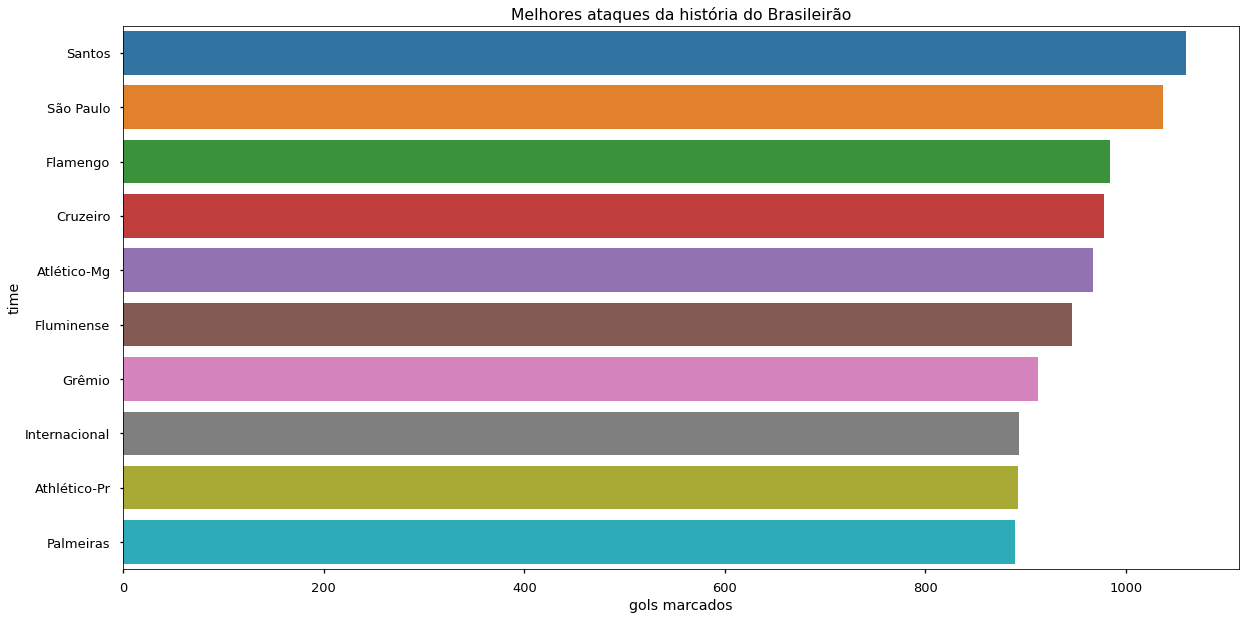

In [92]:
sns.barplot(x="gols marcados", y="time", data=gols_marcados_time.head(10))
plt.title('Melhores ataques da história do Brasileirão')
plt.show()

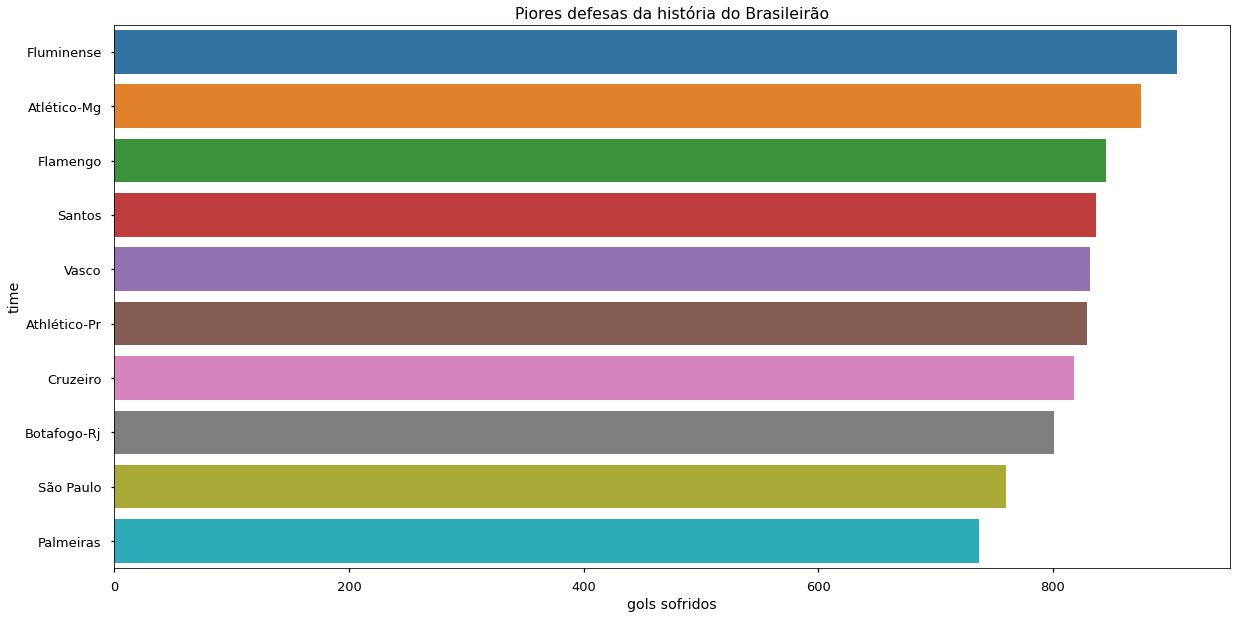

In [95]:
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
 
gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=False).reset_index()


sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Piores defesas da história do Brasileirão')
plt.show()

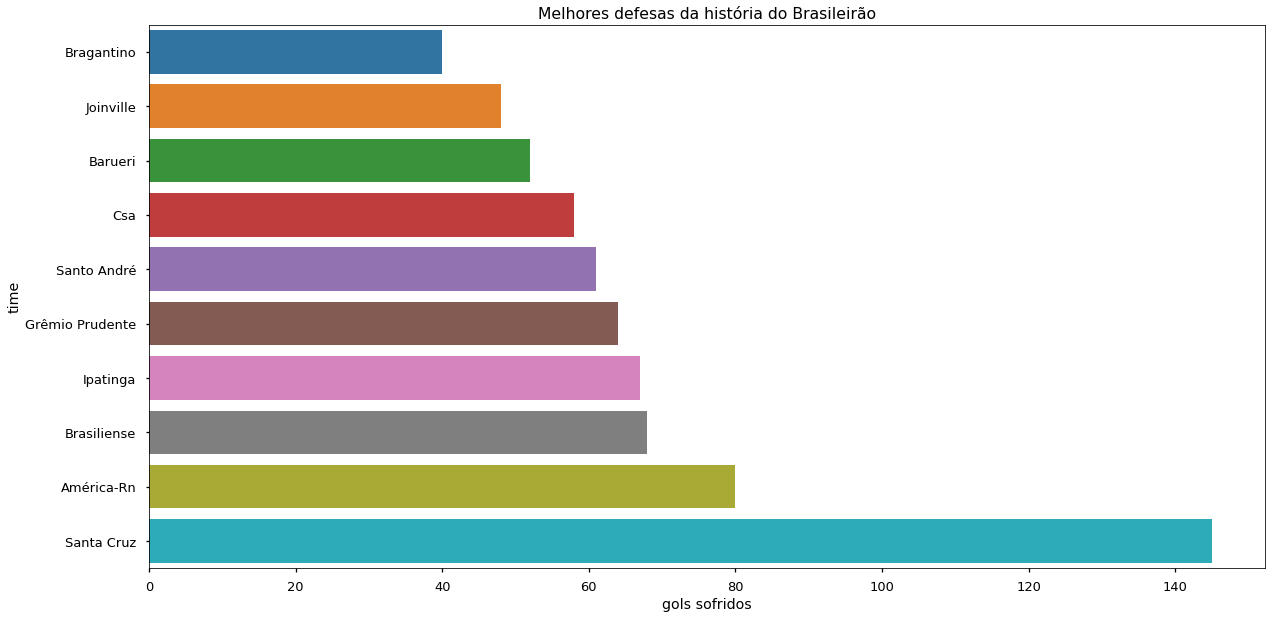

In [96]:
#melhores defesas
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=True).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=True).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=True).reset_index()
sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Melhores defesas da história do Brasileirão')
plt.show()

Este ultimo gráfico mostra um problema, a maioria dos times não disputam todas as edições, devido ao rebaixamento de times. Por isso, a ánalise de melhores defesas não é válida dessa forma, pois os times que menos sofreram gols na verdade são os times que menos participaram da Seria A do brasileirão.
Sendo assim, uma análise que poderia ser feita é a média de gols de cada time (isso vale para Gols Marcados e Sofridos) ao invés da soma total de gols em todas as edições.

In [140]:

jogosm= df.mandante.value_counts()
jogosv = df.visitante.value_counts()
jogos = (jogosm+jogosv).to_frame().reset_index()
jogos = jogos.rename(columns= {0: 'list'})
jogos.index.name = 'index'

jogos.columns= ["time","jogos"]

gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=True).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=True).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_time= gols_time.merge(jogos)
gols_time['media']=gols_time['gols sofridos'] / gols_time['jogos']
gols_time.head(20)
gols_sofridos_time = gols_time.groupby('time')['media'].sum().sort_values(ascending=True).reset_index()


#sns.barplot(x="media", y="time", data=gols_sofridos_time.head(10))
#plt.title('Melhores defesas da história do Brasileirão')
#plt.show()



In [98]:
### melhores ataques por edição
df['clube']                  = df['mandante']
gols_clubes_mandantes        = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_mandantes.rename(columns  = {"mandante placar" : "gols_mandante" }, inplace=True)
 
df['clube']                  = df['visitante']
gols_clubes_visitantes       = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_clubes               = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']
 
ataque_pior   = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()
 
gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)
 
gols_torneio_ataque_pior   = pd.merge(gols_clubes, ataque_pior  , on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior.rename(columns   = {"gols_total": "ataque_pior"  }, inplace=True)
 
gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor','clube_pior'])

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
2,BRA2003,Cruzeiro,102,Vitória,50
1,BRA2004,Santos,103,Guarani,43
0,BRA2004,Santos,103,Ponte Preta,43
5,BRA2005,Corinthians,87,Brasiliense,49
16,BRA2006,São Paulo,66,São Caetano,37
7,BRA2007,Cruzeiro,74,América-Rn,24
13,BRA2008,Flamengo,67,Ipatinga,37
4,BRA2009,Grêmio,67,Athlético-Pr,42
15,BRA2010,Grêmio,68,Guarani,33
17,BRA2011,Fluminense,60,Athlético-Pr,38
